# Stochastic Gradient Descent

In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

epoch 50, x1: -0.028156, x2: -0.143574


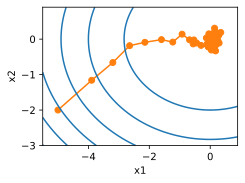

In [5]:
def f(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # Gradient of the objective function
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # Constant learning rate
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

## Dynamic Learning Rate

### Challenges:

In particular we should figure out how rapidly the learning rate should decay.

* If it is too quick, we will stop optimizing prematurely
* If we decreasef it too slowly, we waste too much time on optimization.

The strategies mostly used to deal with this problem involve: 

* a piecewise constant: we decrease the learning rate whenever progress in optimization stalls. This is a common strategy for training deep networks. 
* exponential decay: unfortunately this often leads to premature stopping before the algorithm has converged. 
* polynomial decay: a popular choice with alpha = 0.5. In the case of convex optimization there are a number of proofs that show that this rate is well behaved.

Let's see what the exponential decay looks like in practice: 

epoch 1000, x1: -0.927672, x2: -0.059215


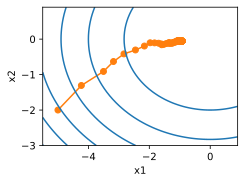

In [7]:
def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

As expected, the variance in the parameters is significantly reduced. However, this comes at the expense of failign to converge to the optimal solution which is __x__ = (0,0). Even after 1000 iteration steps are we still very far away from the optimal solution. Indeed, the algorithm fails to converge at all.

### Can we do better with a polynomial decay?

epoch 50, x1: 0.020560, x2: 0.016575


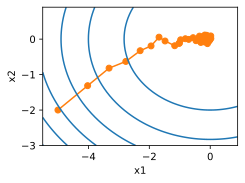

In [8]:
def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

Using a __polynomial decay__ where the learning rate decays with the inverse square root of the  number of steps, convergence gets better after only 50 steps. As shown on the graph above. 

### Notes on Dynamic Learning Rate: 


There exist many more choices for how to set the learning rate. For instance, we could start with a small rate, then rapidly ramp up and then decrease it again, albeit more slowly. We could even alternate between smaller and larger learning rates. There exists a large variety of such schedules. For now let’s focus on learning rate schedules for which a comprehensive theoretical analysis is possible, i.e., on learning rates in a convex setting. For general nonconvex problems it is very difficult to obtain meaningful convergence guarantees, since in general minimizing nonlinear nonconvex problems is NP hard. For a survey see e.g., the excellent lecture notes of Tibshirani 2015.

## Summary

* For convex problems we can prove that for a wide choice of learning rates stochastic gradient descent will converge to the optimal solution.

* For deep learning this is generally not the case. However, the analysis of convex problems gives us useful insight into how to approach optimization, namely to reduce the learning rate progressively, albeit not too quickly.

* Problems occur when the learning rate is too small or too large. In practice a suitable learning rate is often found only after multiple experiments.

* When there are more examples in the training dataset, it costs more to compute each iteration for gradient descent, so stochastic gradient descent is preferred in these cases.

* Optimality guarantees for stochastic gradient descent are in general not available in nonconvex cases since the number of local minima that require checking might well be exponential.